In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y,
)

In [4]:
print("Labels count in y:", np.bincount(y))
print("Labels count in y_train:", np.bincount(y_train))
print("Labels count in y_test:", np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)  # Scale parameters (mu, sigma) built from X_train limits

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


In [7]:
y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d" % (y_test != y_pred).sum())

Misclassified examples: 1


In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [9]:
print("Accuracy: %.3f" % ppn.score(X_test_std, y_test))

Accuracy: 0.978


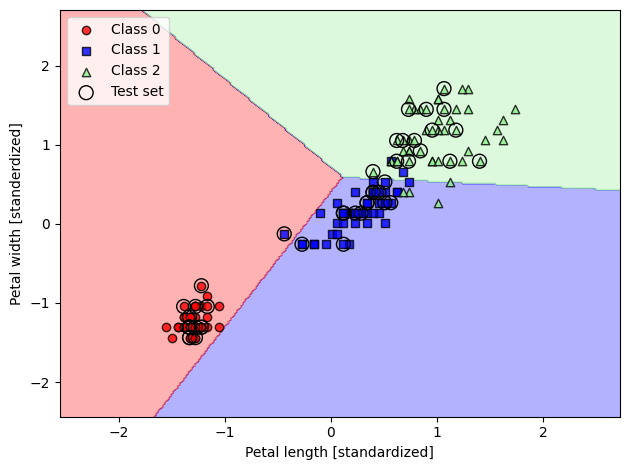

In [10]:
from convenience_function import plot_decision_regions
import matplotlib.pyplot as plt

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standerdized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

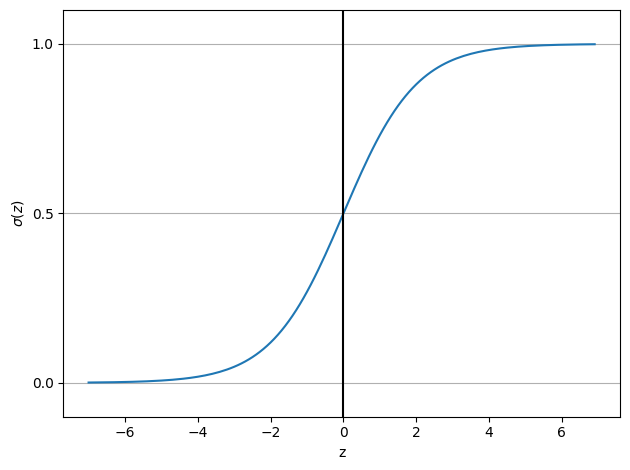

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

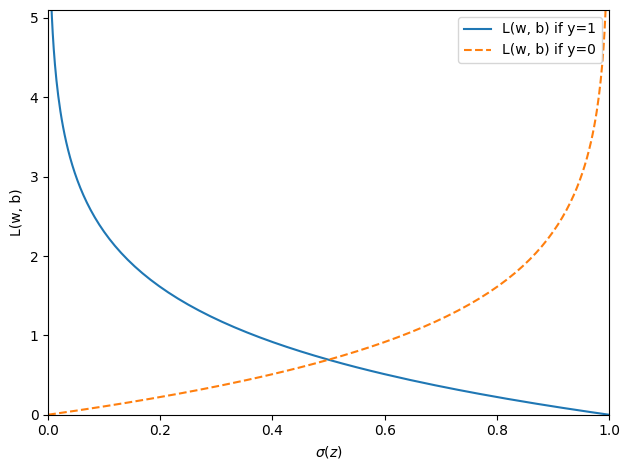

In [12]:
def loss_1(z):
    return -np.log(sigmoid(z))


def loss_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label="L(w, b) if y=1")

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle="--", label="L(w, b) if y=0")

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

plt.xlabel("$\sigma(z)$")
plt.ylabel("L(w, b)")
plt.legend(loc="best")
plt.tight_layout()

plt.show()

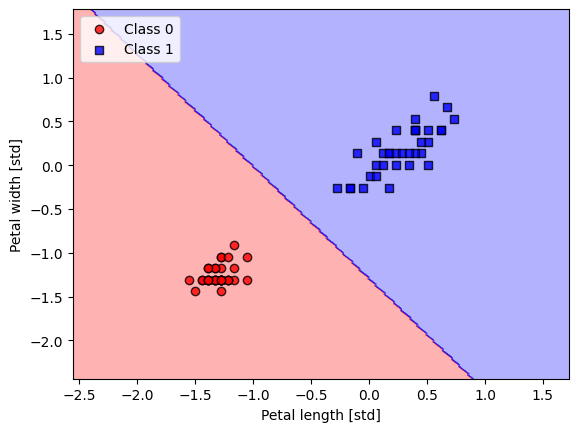

In [13]:
from c3_logres import LogisticRegressionGD

# The LogisticRegressionGD is still only compatible with binary classification
# So we get only the data for 2 labels
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel("Petal length [std]")
plt.ylabel("Petal width [std]")

plt.legend(loc="upper left")
plt.show()

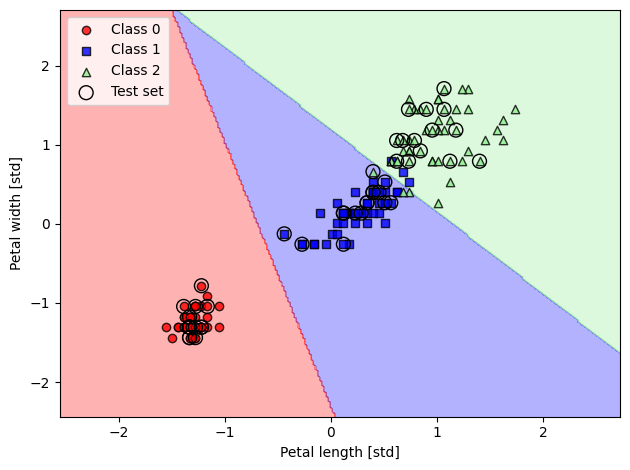

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="ovr")
# lr = LogisticRegression(C=100.0, solver="lbfgs")
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal length [std]")
plt.ylabel("Petal width [std]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [15]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [16]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [17]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [18]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

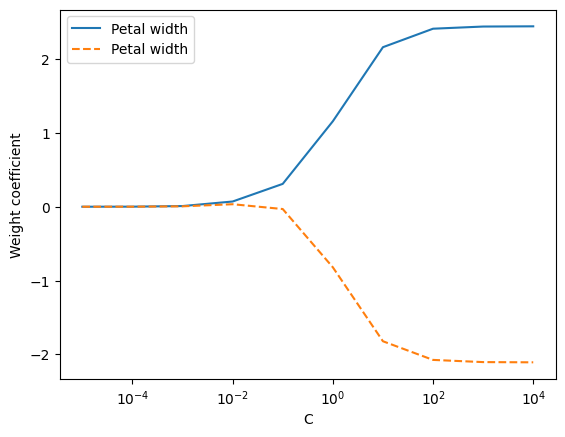

In [19]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, multi_class="ovr")
    lr.fit(X_train_std, y_train)

    weights.append(lr.coef_[1])
    params.append(10.0**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label="Petal width")
plt.plot(params, weights[:, 1], linestyle="--", label="Petal width")
plt.ylabel("Weight coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()

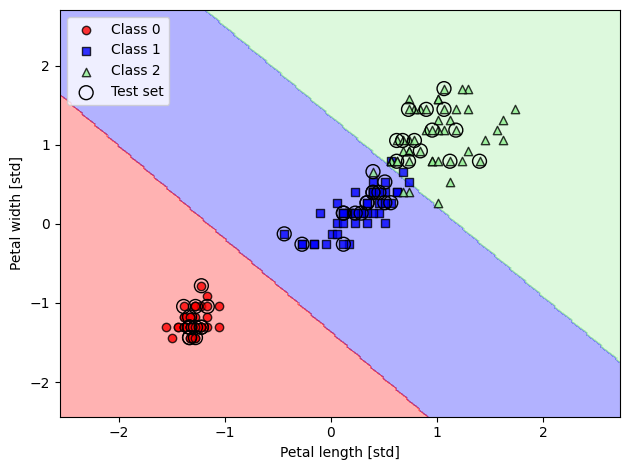

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150),
)

plt.xlabel("Petal length [std]")
plt.ylabel("Petal width [std]")
plt.legend(loc="upper left")
plt.tight_layout()

plt.show()

In [21]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss="perceptron")
lr = SGDClassifier(loss="log")
svm = SGDClassifier(loss="hinge")